#  Data Analysis process

In [2]:
from pandas import DataFrame, read_csv


import matplotlib.pyplot as plt
import pandas as pd 
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import seaborn as sns
import numpy as np
# Enable inline plotting
%matplotlib inline
Location = r'C:\Users\vnayak\Documents\vnayak_data_bkp\Udacity\DataAnalyst_Nano\Intro_Data_Analysis\titanic_data.csv'
df = pd.read_csv(Location)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In the code below we will be removing unwanted columns from the data frame.

In [3]:
cdf=df
cdf=cdf.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'], axis=1)
cdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [4]:
#Checking if dataframe contains any Nan/null values. 
cdf.isnull().values.any()

True

In [5]:
#Check for nan/null 
cdf.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

From above result we see that Age column has 177 Nan values in it.

In [6]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


•	Did Age determined the chances of survival irrespective of Class and Sex?

In [7]:
data_age_cleaned=cdf.dropna()
data_age_cleaned.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [8]:
#Find total count of survivors and total count who died.
#source -> http://wavedatalab.github.io/datawithpython/aggregate.html
def find_total_survivor(data_age_cleaned):
    Survived_df=data_age_cleaned[(data_age_cleaned['Survived'] ==1)]
    total_survivors=Survived_df['Survived'].count()
    return total_survivors


total_surv=find_total_survivor(data_age_cleaned)
print ("Total survivors is ::",total_surv)


('Total survivors is ::', 290)


In [9]:
def find_total_nonSurvivor(data_age_cleaned):
    Dead_df=data_age_cleaned[(data_age_cleaned['Survived'] ==0)]
    total_nonsurvivors=Dead_df['Survived'].count()
    return total_nonsurvivors

tot_non_surv=find_total_nonSurvivor(data_age_cleaned)

print ("Total non- survivors is ::",tot_non_surv)


('Total non- survivors is ::', 424)


In [10]:
#We will find minimum and maximum age of survivor and non survivor.
survivor_min_age=data_age_cleaned[(data_age_cleaned['Survived'] ==1)]['Age'].min()
survivor_max_age=data_age_cleaned[(data_age_cleaned['Survived'] ==1)]['Age'].max()
nonSurvivor_min_age=data_age_cleaned[(data_age_cleaned['Survived'] ==0)]['Age'].min()
nonSurvivor_max_age=data_age_cleaned[(data_age_cleaned['Survived'] ==0)]['Age'].max()

print ("Survivor_min_age is :: ",survivor_min_age)
print("Survivor_max_age is ::",survivor_max_age)
print("NonSurvivor_min_age is :: ",nonSurvivor_min_age)
print("NonSurvivor_max_age is :: ",nonSurvivor_max_age)

('Survivor_min_age is :: ', 0.41999999999999998)
('Survivor_max_age is ::', 80.0)
('NonSurvivor_min_age is :: ', 1.0)
('NonSurvivor_max_age is :: ', 74.0)


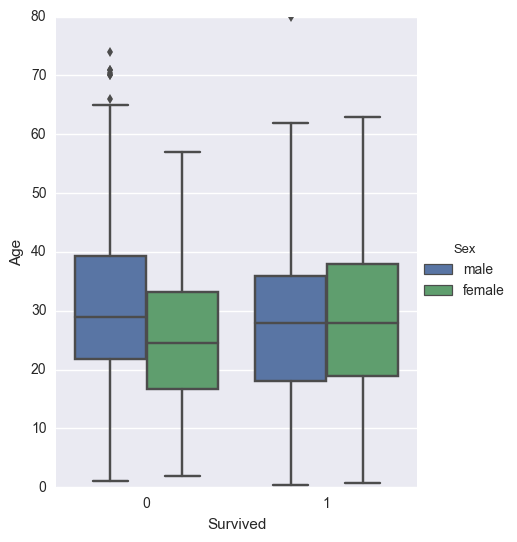

In [11]:
graph = sns.factorplot(x="Survived",y="Age",hue='Sex',data=data_age_cleaned,kind="box",size=5.5,aspect=.8)
#http://seaborn.pydata.org/generated/seaborn.factorplot.html#seaborn.factorplot



With the help of our findings and the above represented graph, it shows that age did not determined the chances of survivial.

Did class of an individual determined the chances of survival.
For this we will find total number of passengers in First class and out of them how many were survivors.

Then total number of passengers in second class and how many were survivors.

Finally total number of passengers in third class and how many were survivors.

In [54]:
#gr1=sns.factorplot(x="Survived",y="Age",col="Pclass",data=data_age_cleaned,saturation=0.5,kind="bar",ci=None,aspect=0.6)

In [12]:

def totalOfClasswise(dataframe,pclass):
    tot_class=dataframe[(dataframe['Pclass'] ==pclass)]['Pclass'].count().astype('float')
    return tot_class

fclass=totalOfClasswise(data_age_cleaned,1)
print("Total in first class",fclass)

sclass=totalOfClasswise(data_age_cleaned,2)
print("Total in second class",sclass)

tclass=totalOfClasswise(data_age_cleaned,3)
print("Total in third class",tclass)
    



('Total in first class', 186.0)
('Total in second class', 173.0)
('Total in third class', 355.0)


In [13]:

def classwiseSurvivor(dataframe,pclass,survived):
    classdf=dataframe[(dataframe['Pclass'] ==pclass)]
    class_survivor=classdf[(classdf['Survived']==survived)]['Survived'].count().astype('float')
    return class_survivor

firstclass_survivor=classwiseSurvivor(data_age_cleaned,1,1)
secondclass_survivor=classwiseSurvivor(data_age_cleaned,2,1)
thirdclass_survivor=classwiseSurvivor(data_age_cleaned,3,1)

print ("Number of firstclass_survivor",firstclass_survivor)
print ("Number of secondclass_survivor",secondclass_survivor)
print ("Number of thirdclass_survivor",thirdclass_survivor)


def surviva_rate(survivor_class,totalInClass):
    survival_rate=((survivor_class/totalInClass) * 100)
    return survival_rate

perc_fclass_surv=surviva_rate(firstclass_survivor,fclass)
perc_sclass_surv=surviva_rate(secondclass_survivor,sclass)
perc_tclass_surv=surviva_rate(thirdclass_survivor,tclass)
    

print("Survivial rate of first class is ::",perc_fclass_surv)
print("Survivial rate of second class is ::",perc_sclass_surv)
print("Survival rate of third class is ::",perc_tclass_surv)
    


('Number of firstclass_survivor', 122.0)
('Number of secondclass_survivor', 83.0)
('Number of thirdclass_survivor', 85.0)
('Survivial rate of first class is ::', 65.591397849462368)
('Survivial rate of second class is ::', 47.97687861271676)
('Survival rate of third class is ::', 23.943661971830984)


In [14]:
classdf=data_age_cleaned[(data_age_cleaned['Survived'] ==1)]
class_survivor=classdf.groupby(['Pclass']).size().values
class_survivor
print ("class_survivor",class_survivor)

non_classdf=data_age_cleaned[(data_age_cleaned['Survived'] ==0)]
non_class_survivor=non_classdf.groupby(['Pclass']).size().values
non_class_survivor
print ("non_class_survivor",non_class_survivor)



('class_survivor', array([122,  83,  85], dtype=int64))
('non_class_survivor', array([ 64,  90, 270], dtype=int64))


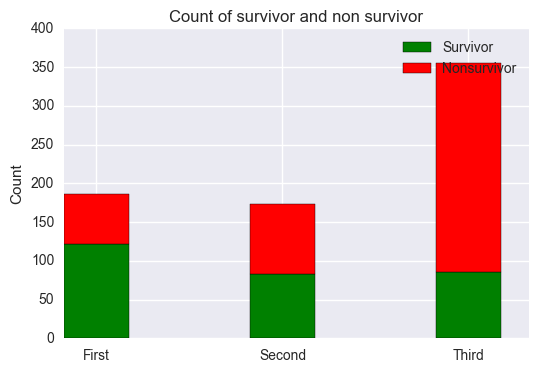

In [15]:
#Since we have imported numpy and matplotlib, no need to import again.
#http://matplotlib.org/examples/pylab_examples/bar_stacked.html
import numpy as np
N = 3
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, class_survivor, width, color='g')
p2 = plt.bar(ind, non_class_survivor, width, color='r',
             bottom=class_survivor)

plt.ylabel('Count')
plt.title('Count of survivor and non survivor')
plt.xticks(ind + width/2., ('First', 'Second', 'Third'))
plt.legend((p1[0], p2[0]), ('Survivor', 'Nonsurvivor'))
plt.show()

From the graph above it is clear that socio economic factor- class impacted the chances of survival.It clearly indicates that passengers travelling in First class had a higher survival rate than second and third class. Also second class passengers had a better survival rate when compared with third class passengers.

Now we will see how many males and females survived out of the total survived.

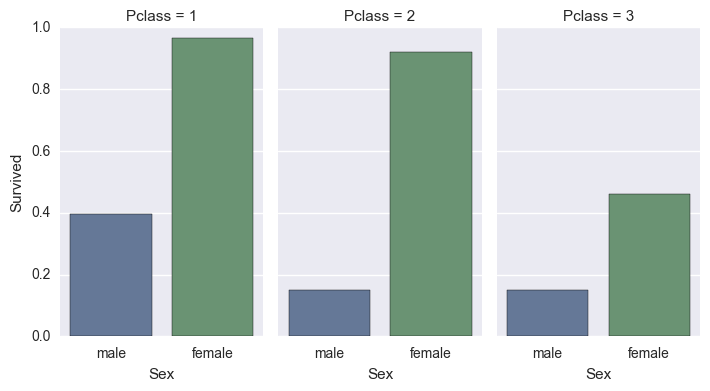

In [16]:
#Class_survivial_graph = sns.factorplot("Survived", col="Sex", col_wrap=4,data=data_age_cleaned,kind="count", size=2.5, aspect=.8)
g=sns.factorplot(x="Sex", y="Survived", col="Pclass",data=data_age_cleaned, saturation=0.5,kind="bar", ci=None, aspect=.6)




From the above graph we can see that Female had a better chance of survival than male in first, second and third class passengers.

Conclusion

From above analysis it is clear that socio economic factor impacted the chances of survival. Passengers from first class had a higher survival rate followed by second class and then third class. Amongst the survivors female had better chance of survival than male.